# Einleitung

Dies ist ein Mini-Beispiel zum automatischen Differenzieren in Berechnungsgraphen und dem darauf aufbauenden Gradientenabstieg zum automatischen Lernen von Modell-Parametern, die einen Fehler minimieren.

# Beispielfunktion / Beispieldatenquelle

In [9]:
def f(x1,x2, p1,p2,p3):
    return p1*x1 + p2*x2 + p3*x1*x2

In [11]:
f(1,1, 3,5,4)

12

In [12]:
import numpy as np

true_p1 = 3.0
true_p2 = 5.0
true_p3 = 4.0

D = []

for x1 in np.arange(-1.0, 1.0, 0.1):
    for x2 in np.arange(-1.0, 1.0, 0.1):
        y = f(x1,x2, true_p1, true_p2, true_p3)
        D.append( (x1,x2, y) )

In [13]:
# Liste der Beispieldaten ausgeben
D

[(-1.0, -1.0, -4.0),
 (-1.0, -0.9, -3.9),
 (-1.0, -0.8, -3.8),
 (-1.0, -0.7000000000000001, -3.6999999999999997),
 (-1.0, -0.6000000000000001, -3.5999999999999996),
 (-1.0, -0.5000000000000001, -3.4999999999999996),
 (-1.0, -0.40000000000000013, -3.4000000000000004),
 (-1.0, -0.30000000000000016, -3.3000000000000003),
 (-1.0, -0.20000000000000018, -3.2),
 (-1.0, -0.1000000000000002, -3.1),
 (-1.0, -2.220446049250313e-16, -3.0),
 (-1.0, 0.09999999999999964, -2.9000000000000004),
 (-1.0, 0.19999999999999973, -2.8000000000000003),
 (-1.0, 0.2999999999999998, -2.7),
 (-1.0, 0.3999999999999997, -2.6000000000000005),
 (-1.0, 0.49999999999999956, -2.5000000000000004),
 (-1.0, 0.5999999999999996, -2.4000000000000004),
 (-1.0, 0.6999999999999997, -2.3000000000000003),
 (-1.0, 0.7999999999999996, -2.2),
 (-1.0, 0.8999999999999995, -2.1000000000000005),
 (-0.9, -1.0, -4.1),
 (-0.9, -0.9, -3.96),
 (-0.9, -0.8, -3.82),
 (-0.9, -0.7000000000000001, -3.6800000000000006),
 (-0.9, -0.6000000000000001, 

In [14]:
len(D)

400

# Berechnung des Gradienten im Berechnungsgraph

Hier manuell rückwärts. Deep Learning Bibliotheken machen dies für uns (Automatisches Differenzieren).

![Berechnung des Gradienten](automatisches_differenzieren_mini_beispiel.jpg)

# Gradientenabstieg

In [48]:
p1 = -10  # sollte sein: 3
p2 = 0.0  # sollte sein: 5
p3 = 10.0 # sollte sein: 4

lernrate = 0.01

history = [ [],[],[] ]

for train_step in range(0,2000):
    
    # 1. hole nächstes Trainingsbeispiel
    rnd_idx = np.random.randint(0, len(D))
    training_beispiel = D[rnd_idx]
    #print(training_beispiel)    
    x1,x2, y = training_beispiel    
    
    # 2. berechne Netzoutput
    out = p1*x1 + p2*x2 + p3*x1*x2
    
    # 3. berechne Gradient
    #    hier: manuell
    #    in TensorFlow: per Automatischem Differenzieren (AD)
    gradient = ( -2*(y-out)*x1,
                 -2*(y-out)*x2,
                 -2*(y-out)*x1*x2 )
    #print(f"(x1,x2)=({x1:.2f},{x2:.2f}) \t--> gradient={gradient}")
    
    # 4. Gradientenabstieg
    p1 -= lernrate * gradient[0]
    p2 -= lernrate * gradient[1]
    p3 -= lernrate * gradient[2]            
    if train_step % 100 == 0:
        print( f"(p1,p2,p3)=({p1:.3f},{p2:.3f},{p3:.3f})" )
    
    history[0].append( p1 )
    history[1].append( p2 )
    history[2].append( p3 )
                

(p1,p2,p3)=(-9.879,0.169,9.915)
(p1,p2,p3)=(-3.002,3.231,7.824)
(p1,p2,p3)=(0.070,4.252,7.223)
(p1,p2,p3)=(1.582,4.780,6.509)
(p1,p2,p3)=(2.397,4.805,5.969)
(p1,p2,p3)=(2.764,4.801,5.579)
(p1,p2,p3)=(2.977,4.937,5.322)
(p1,p2,p3)=(3.029,5.095,5.042)
(p1,p2,p3)=(3.102,5.010,4.798)
(p1,p2,p3)=(3.043,5.005,4.671)
(p1,p2,p3)=(3.059,4.963,4.527)
(p1,p2,p3)=(3.062,4.976,4.417)
(p1,p2,p3)=(3.036,4.983,4.343)
(p1,p2,p3)=(3.052,4.988,4.273)
(p1,p2,p3)=(3.026,5.010,4.209)
(p1,p2,p3)=(3.018,5.012,4.162)
(p1,p2,p3)=(3.014,5.006,4.129)
(p1,p2,p3)=(3.010,5.003,4.107)
(p1,p2,p3)=(3.001,5.003,4.078)
(p1,p2,p3)=(2.998,5.007,4.063)


# Visualisierung des Verlaufs der Parameter

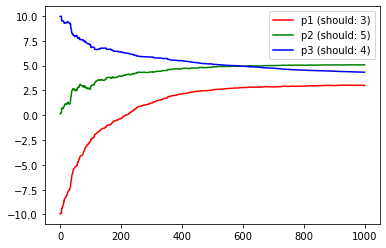

In [46]:
from matplotlib import pyplot as plt


plt.plot(history[0], color="red",   label="p1 (should: 3)")
plt.plot(history[1], color="green", label="p2 (should: 5)")
plt.plot(history[2], color="blue",  label="p3 (should: 4)")
plt.legend()
plt.show()